On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [1]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('problem1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [22]:
#checking to see if what I know from the question matches up with what I'm seeing in the data
len(df['shop_id'].unique())

100

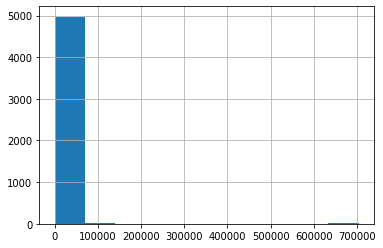

In [28]:
#looking at the distribution in order amounts it is clear that there are huge outliers
df['order_amount'].hist()

In [8]:
#looking at spread of order amount
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [11]:
#observing details around extreme order
df[df['order_amount'] == 704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [31]:
#finding median of dataset as it is
print('median: ', np.median(df['order_amount']))

#filtering dataset to only include middle 50% of values (IQR)
newdf = df[(df['order_id'] > 163) & (df['order_id'] < 390)]

#IQR median
print('IQR median: ', np.median(newdf['order_id']))

median:  284.0
IQR median:  276.5


- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.
    - When calculating the Average Order Value, an outlier of 704000 was also included in the calculation. This caused the AOV to be skewed much higher than it should be. We can see that this comes from one user making a very large purchase several times in March. A better way to evaluate this data would be to use a method that is more robust to outliers, such as the median of the dataset or the median of the Interquartile Range of the dataset (middle 50%). 
- What metric would you report for this dataset?
    - I would use the median of the middle 50% of the dataset. This would allow me to take into consideration only the values that make up the middle 50% of the dataset (thereby dropping from consideration values that are very low or very high). 
- What is its value?
    - 276.5
